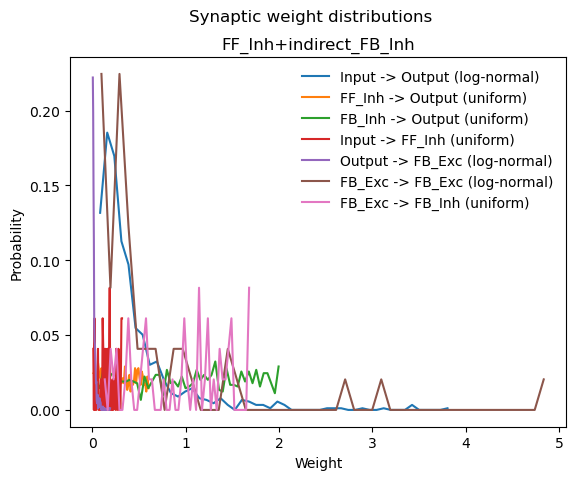

In [1]:
import numpy as np
%run simulate_dynamic_model --config_file_path=config/simulate_config_5_FF_Inh+indirect_FB_Inh_Hebb_weight_norm.yaml --plot

In [3]:
start_time = time.time()
channel_conductance_dynamics_dict, net_current_dynamics_dict, cell_voltage_dynamics_dict, \
    network_activity_dynamics_dict, mean_network_activity_dict = \
        test_network(t, sorted_input_patterns, num_units_dict, synapse_tau_dict, cell_tau_dict,
                                   weight_dict, weight_config_dict, activation_function_dict, synaptic_reversal_dict, time_point)
initial_activity_dict = deepcopy(mean_network_activity_dict)
initial_weight_dict = deepcopy(weight_dict)
print('Inital test took %.1f s' % (time.time() - start_time))

Inital test took 111.8 s


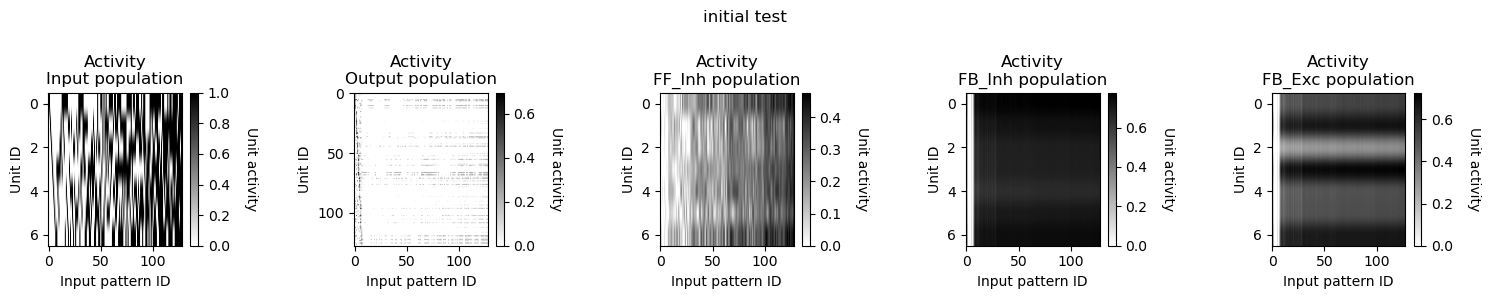

In [4]:
plot_activity_summary(initial_activity_dict, description='initial test')

In [5]:
current_time = time.time()
channel_conductance_dynamics_dict, net_current_dynamics_dict, cell_voltage_dynamics_dict, \
network_activity_dynamics_dict, train_network_activity_history_dict, weight_history_dict = \
    train_network(t, sorted_input_patterns, num_units_dict, synapse_tau_dict, cell_tau_dict,
                 weight_dict, weight_config_dict, activation_function_dict, synaptic_reversal_dict, time_point, train_epochs, train_seed)
print('Train took %.1f s' % (time.time() - current_time))

Train took 1014.9 s


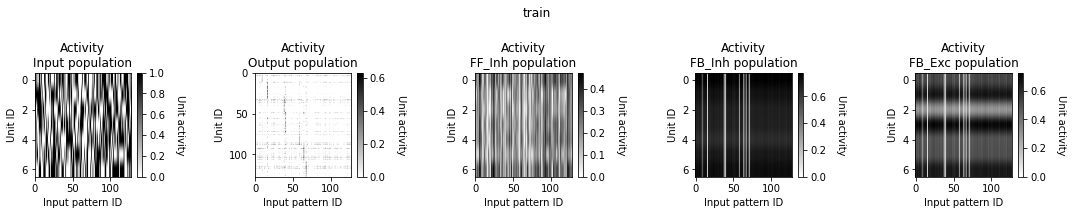

In [5]:
# plot_activity_summary(train_network_activity_history_dict, description='train')

In [6]:
current_time = time.time()
channel_conductance_dynamics_dict, net_current_dynamics_dict, cell_voltage_dynamics_dict, \
network_activity_dynamics_dict, mean_network_activity_dict = \
    test_network(t, sorted_input_patterns, num_units_dict, synapse_tau_dict, cell_tau_dict,
                               weight_dict, weight_config_dict, activation_function_dict, synaptic_reversal_dict, time_point)
final_activity_dict = deepcopy(mean_network_activity_dict)
print('Final test took %.1f s' % (time.time() - current_time))

Final test took 104.7 s


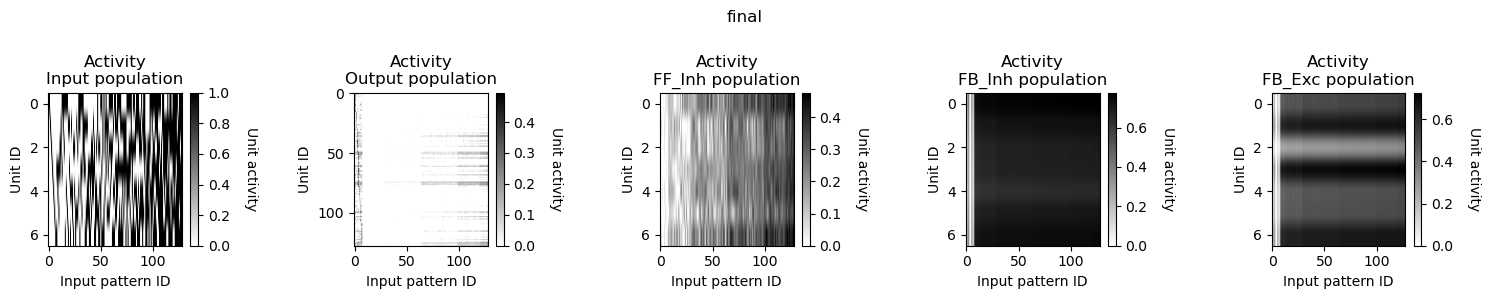

In [7]:
plot_activity_summary(final_activity_dict, description='final')

In [8]:
delta_weight = np.subtract(weight_history_dict['Output']['Input'][-1], initial_weight_dict['Output']['Input'])
print(np.min(delta_weight))
print(np.max(delta_weight))
print(np.mean(delta_weight))
print(np.min(initial_weight_dict['Output']['Input']))
print(np.max(initial_weight_dict['Output']['Input']))
print(np.mean(initial_weight_dict['Output']['Input']))

-2.4401555810843716
0.6202573152452334
4.163336342344337e-17
0.006796112363165174
3.803631236062121
0.3891419


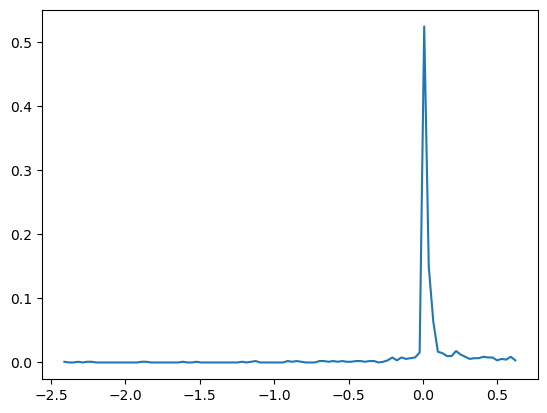

In [14]:
plt.figure()
hist, edges = np.histogram(delta_weight, bins=100, density=True)
width = edges[1] - edges[0]
plt.plot(edges[:-1]+width, hist * width)

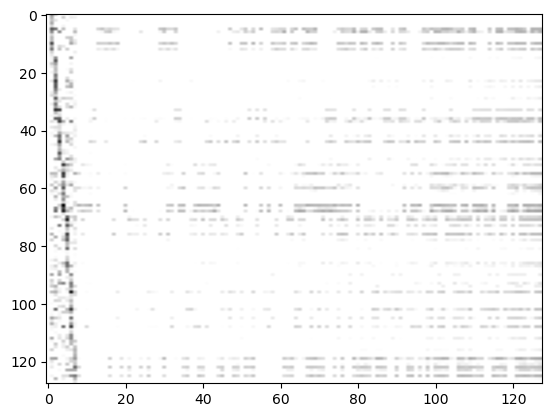

In [15]:
argmax_indices = np.argmax(initial_activity_dict['Output'], axis=0)
initial_sorted_indices = np.argsort(argmax_indices)
im1 = plt.imshow(initial_activity_dict['Output'][:, initial_sorted_indices].transpose(), aspect='auto', cmap='binary')

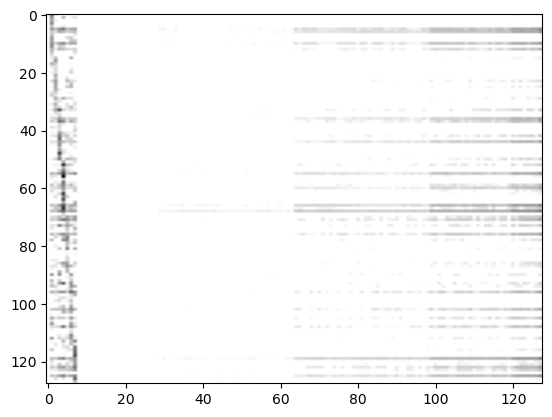

In [16]:
im1 = plt.imshow(final_activity_dict['Output'][:, initial_sorted_indices].transpose(), aspect='auto', cmap='binary')

In [17]:
sparsity_dict, similarity_matrix_dict, selectivity_dict, fraction_active_patterns_dict, \
fraction_active_units_dict = analyze_slice(mean_network_activity_dict)

sparsity_dynamics_dict, similarity_dynamics_dict, selectivity_dynamics_dict, \
fraction_nonzero_response_dynamics_dict = analyze_dynamics(network_activity_dynamics_dict)

median_sparsity_dynamics_dict, median_similarity_dynamics_dict, mean_selectivity_dynamics_dict, \
fraction_nonzero_response_dynamics_dict = analyze_median_dynamics(network_activity_dynamics_dict)

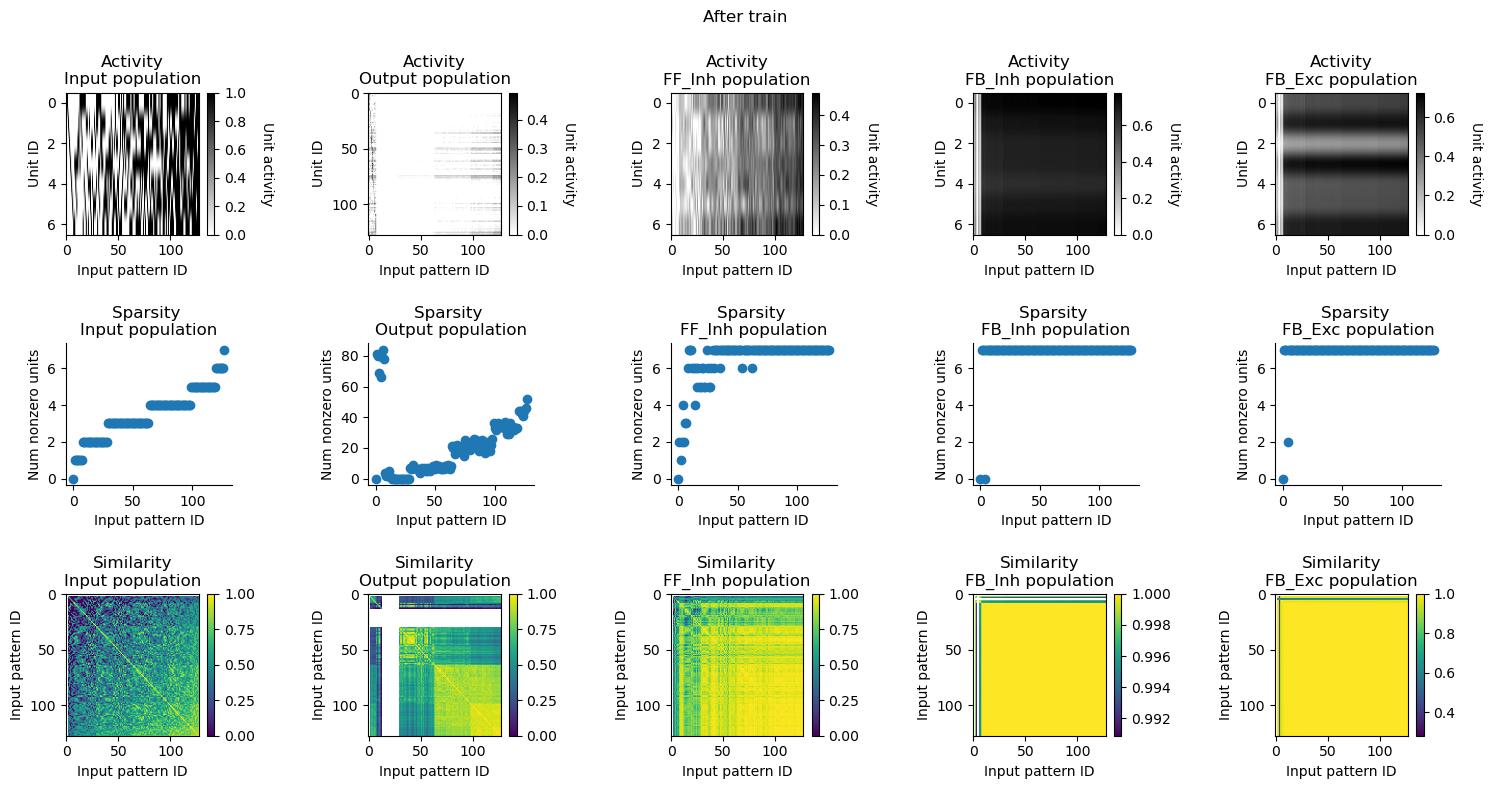

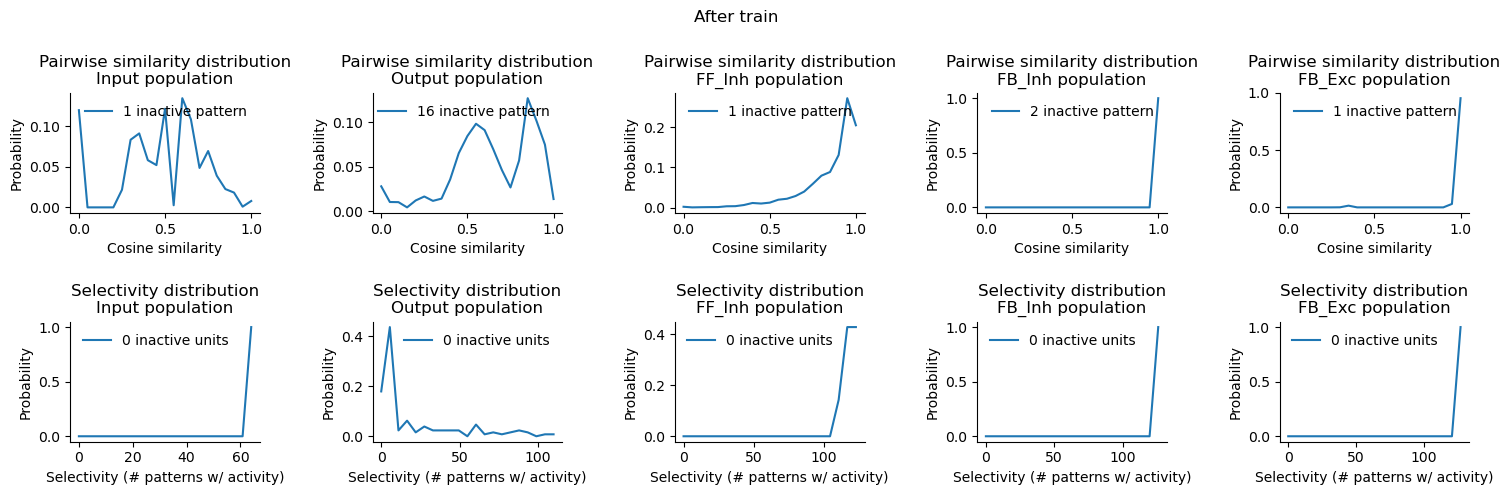

In [18]:
plot_model_summary(mean_network_activity_dict, sparsity_dict, similarity_matrix_dict, selectivity_dict, "After train")

In [2]:
print(sparsity_dict)

NameError: name 'sparsity_dict' is not defined